In [18]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
# Display options for readability
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [20]:
# Step 1. Load the dataset
file_path = "Original_data.csv"
df = pd.read_csv(file_path)

In [21]:
# Step 2. Initial exploration

print("🔹 First 5 rows of the dataset:")
print(df.head(), "\n")

🔹 First 5 rows of the dataset:
  LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
0      AUS  1971       15.992   0.726   33.990       439.73
1      AUS  1972       15.091   0.685   34.184       450.44
2      AUS  1973       15.117   0.681   37.956       507.85
3      AUS  1974       14.771   0.754   45.338       622.17
4      AUS  1975       11.849   0.682   44.363       616.34 



In [22]:
print("🔹 Dataset info:")
print(df.info(), "\n")

🔹 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1341 non-null   object 
 1   TIME         1341 non-null   int64  
 2   PC_HEALTHXP  1341 non-null   float64
 3   PC_GDP       1341 non-null   float64
 4   USD_CAP      1341 non-null   float64
 5   TOTAL_SPEND  1341 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 63.0+ KB
None 



In [23]:
# Rename LOCATION to COUNTRY
df.rename(columns={'LOCATION': 'COUNTRY'}, inplace=True)

# Rename TIME to YEAR
df.rename(columns={'TIME': 'YEAR'}, inplace=True)

# Min and max YEAR
print(f"🔹 Year range: {df['YEAR'].min()} - {df['YEAR'].max()}\n")

# Convert YEAR to string (categorical)
df['YEAR'] = df['YEAR'].astype(str)

# Separate columns by type
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

print("\n🔹 Categorical columns summary:")
for col in categorical_cols:
    print(f"\n▶ {col} (top 10 most frequent)")
    print(df[col].value_counts().head(10))
    print(f"Unique values: {df[col].nunique()}")

print("🔹 Numeric columns summary:")
display(df[numeric_cols].describe().T)  # Transposed for better readability

🔹 Year range: 1970 - 2022


🔹 Categorical columns summary:

▶ COUNTRY (top 10 most frequent)
COUNTRY
CAN    53
KOR    53
ISL    53
FIN    52
NOR    52
SWE    52
NLD    51
DEU    51
AUS    50
IRL    47
Name: count, dtype: int64
Unique values: 44

▶ YEAR (top 10 most frequent)
YEAR
2016    41
2015    41
2019    41
2017    41
2014    40
2020    40
2018    40
2013    39
2012    37
2021    36
Name: count, dtype: int64
Unique values: 53
🔹 Numeric columns summary:


,count,mean,std,min,25%,50%,75%,max
PC_HEALTHXP,1341.0,16.632877,6.613320,5.545,11.849,15.238,20.580,40.239
PC_GDP,1341.0,1.215524,0.479568,0.207,0.802,1.187,1.524,2.870
USD_CAP,1341.0,338.278398,226.158326,3.628,144.592,317.795,496.858,1432.309
TOTAL_SPEND,1341.0,14439.322088,43259.358895,5.810,756.280,2786.190,8794.360,475596.740


In [24]:
# Step 3. Clean column names (remove spaces, uppercase/lowercase)
df.columns = df.columns.str.strip().str.upper()

In [25]:
# Step 4. Check for missing values
print("🔹 Missing values per column:")
print(df.isnull().sum(), "\n")

🔹 Missing values per column:
COUNTRY        0
YEAR           0
PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
TOTAL_SPEND    0
dtype: int64 



In [26]:
# Step 5. Check for duplicates
duplicates = df.duplicated().sum()
print(f"🔹 Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.\n")

🔹 Number of duplicate rows: 0


In [27]:
# Step 6. Quick correlation check
corr = df.select_dtypes(include=np.number).corr()
print("🔹 Correlation matrix:\n", corr, "\n")

🔹 Correlation matrix:
              PC_HEALTHXP    PC_GDP   USD_CAP  TOTAL_SPEND
PC_HEALTHXP     1.000000  0.718099  0.112574    -0.055372
PC_GDP          0.718099  1.000000  0.643091     0.307392
USD_CAP         0.112574  0.643091  1.000000     0.521185
TOTAL_SPEND    -0.055372  0.307392  0.521185     1.000000 



In [28]:
# Step 7. Save cleaned data
df.to_csv("cleaned_data.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_data.csv'")

✅ Cleaned dataset saved as 'cleaned_data.csv'


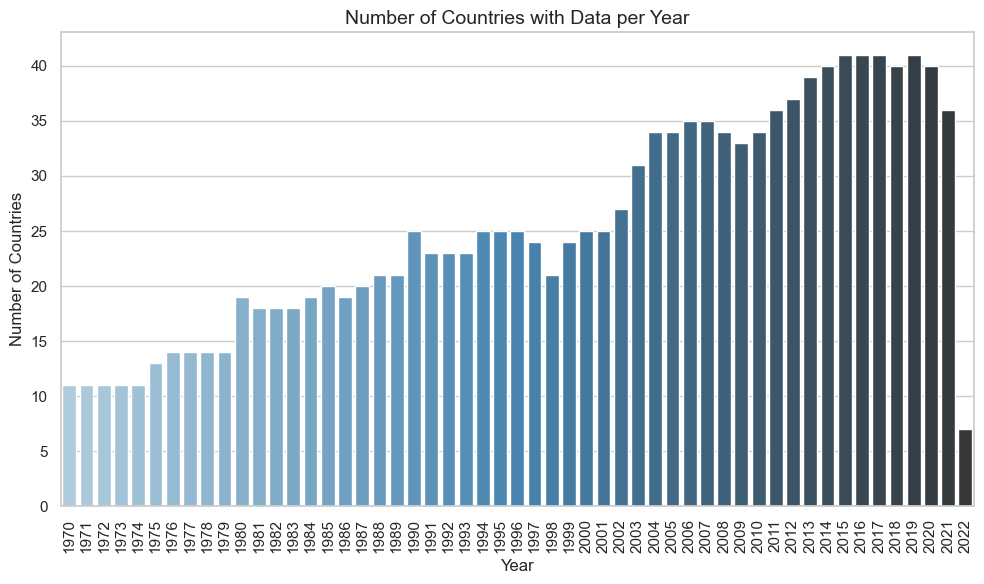

In [29]:
# Step 8. Find missing COUNTRY–YEAR combinations

# Count how many unique countries have data per year
countries_per_year = (
    df.groupby('YEAR')['COUNTRY']
    .nunique()
    .reset_index()
    .rename(columns={'COUNTRY': 'COUNTRY_COUNT'})
)

# Sort by YEAR numerically (in case it's stored as string)
countries_per_year['YEAR'] = countries_per_year['YEAR'].astype(int)
countries_per_year = countries_per_year.sort_values('YEAR')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=countries_per_year, x='YEAR', y='COUNTRY_COUNT', palette='Blues_d')

plt.title("Number of Countries with Data per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Countries", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()